## Custom time imput

In this session we want to demonstrate another feature how to use the TTM and our software, where we want to give special attention to the source term $S(x,t)$ in the coupled heat diffusion equation. 

\begin{align}
C_E \cdot\rho\cdot\partial_t T_E &= \partial_x(k_E(T_E)\partial_x T_E(x,t)) + G(T_L-T_E) + S(x,t) \\ \nonumber
C_L\cdot\rho\cdot\partial_t T_L &= \partial_x(k_L(T_L)\partial_x T_L(x,t)) + G(T_E-T_L)
\end{align}

* We consider the time grid of a THz pulse, from data obtained in the lab and map it on the required time grid of the simulation. 
* The spacial decay of the injected energy is computed via Lambert Beer´s law, i.e. exponential decay according to the optical penetration depth. 
* The workflow of this session is as follows:
  * Load the data from the `.txt` file [THz-data](https://github.com/udcm-su/heat-diffusion-1D/blob/master/Examples/THzPulse.txt) and pass it on to the `source()` class. (Here the pulse is a THz in time but in principle it can be anything.)
  * Choose an extra refined time grid around $t_0$ of the pulse to correctly capture the dynamics in time
  * Define a material layer (here STO).
  * Run the simulation and visualize the output dynamics.


* To make the simulation run, import all the packages needed: [TTMObject](https://github.com/udcm-su/heat-diffusion-1D/blob/master/Code/TTMObject.py),[Numpy](https://pypi.org/project/numpy/); [Matplotlib](https://pypi.org/project/matplotlib/) [B-splines](https://github.com/johntfoster/bspline); [Progressbar](https://pypi.org/project/tqdm/)

Not required but makes physical units more obvious: [SI-units](https://pypi.org/project/numericalunits/)

In [1]:
from TMMObject import * 
import numericalunits as u
u.reset_units('SI')

In [2]:
# Load data from the lab
labData = np.loadtxt('THzPulse.txt')
ttime = labData[:,0]*u.ps
ampl = labData[:,1]
#Define a source
s                           = source()
s.sourcetype                = "THz"
s.optical_penetration_depth = 45*u.nm          #Optical penetration depth for each layer 
s.FWHM                      = 1*u.ps            #Full width half max of the laser pulse
s.fluence                   = 5*u.mJ/u.cm**2    #Fluence of the laser
s.t0                        = 1.5*u.ps          #Approximately the time of THz peak
s.loadData                  = [ttime,ampl]      #implementing the Data from the lab
s.adjusted_grid             = 'on'              #Injecting more points in the time grid
s.dt0                       = 3*u.ps            #t0-dt0 and t0+dt0 get more points
s.extra_points              = 600               #Amount of extra points

In [3]:
#Two temperatures are considered, electron and lattice
sim = simulation(2,s)
#add parameters for both layers and both systems
#(lengt, conductivity [electron, lattice], heatCapacity [electron, lattice], density, linear Coupling) 
#SRO Layer
sim.addLayer(40*u.nm,[6*u.W/(u.m*u.K),1*u.W/(u.m*u.K)],[lambda Te: 0.112*Te,450],6500*u.kg/(u.m**3),5e17*u.W/(u.m**3*u.K)) 
#STO Layer
sim.addLayer(80*u.nm,[12*u.W/(u.m*u.K),1*u.W/(u.m*u.K)],[lambda Te: 0.025*Te,730],5100*u.kg/(u.m**3),5e17*u.W/(u.m**3*u.K))
sim.final_time = 12*u.ps

#To get the raw output
#[phi_E,phi_L,x,t] = sim.run() 

------------------------------------------------------------
The simulation object of the2 temerature system has been passed on to the visual class.
------------------------------------------------------------
-----------------------------------------------------------
 No specific time constant has been indicated. 
 The stability region has been calculated and an appropriate timestep has been chosen.
 Timestep = 2.79e-14 s
-----------------------------------------------------------
-----------------------------------------------------------
A refined Grid around t0 has been applied
-----------------------------------------------------------
-----------------------------------------------------------
THz time profile of source is taken into account.
-----------------------------------------------------------


100%|██████████████████████████████████████████████████████████████████████████████| 867/867 [00:00<00:00, 4624.62it/s]


-----------------------------------------------------------
Heat diffusion in a coupled electron-lattice system has been simulated
Eleapsed time in E.E.- loop: 0.18747496604919434
-----------------------------------------------------------


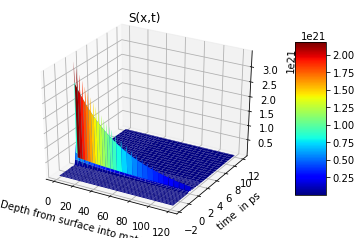

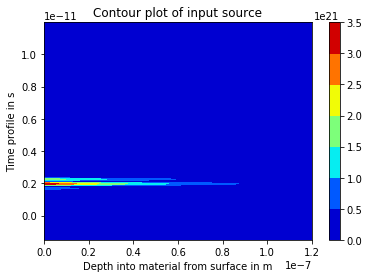

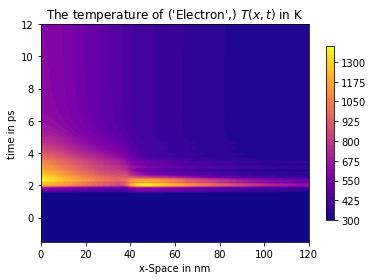

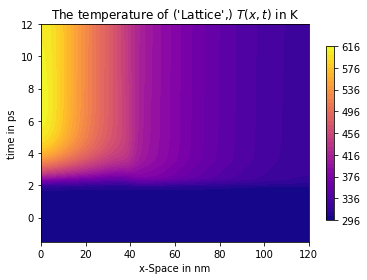

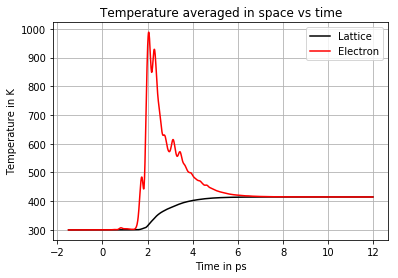

In [4]:
#Create a visual object where the simulation gets passed on 
v = visual(sim)
#Output of v.source is the full matrix of the source(x,t)
so = v.source()
#A contourplot of the electron system
v.contour('Electron')
v.contour('Lattice') 
#Time dynamics of Temperature, averaged in space 
[tt,avT_E,avT_L] = v.average()